# 1. Basic NLP

## 1.1 Counting words

In [1]:
import pandas as pd
import os

In [2]:
path = "../../data/examples/"
os.listdir(path)

['democracy_gdp.csv',
 'manifesto_english_speaking.parquet',
 'world_bank_data.csv']

In [3]:
file_name = f"{path}/manifesto_english_speaking.parquet"
df_all = pd.read_parquet(file_name).query("countryname!='Canada'")
df_all.head(2)

party               partyname          keys  \
countryname date                                                      
Australia   1961-12-01  63320  Australian Labor Party  63320_196112   
            1961-12-01  63330  Democratic Labor Party  63330_196112   

                        manifesto_id  \
countryname date                       
Australia   1961-12-01  63320_196112   
            1961-12-01  63330_196112   

                                                                     text  
countryname date                                                           
Australia   1961-12-01  Labour government would subsidise interest rat...  
            1961-12-01  New concepts needed for Nation’s problems.  Me...

In [4]:
df_all.reset_index().countryname.unique().tolist()

['Australia', 'Ireland', 'South Africa', 'United Kingdom', 'United States']

### 1.1.1 Create count function

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

count_array = vectorizer.fit_transform(
                        df_all['text'] # INPUT THE TEXT COLUMN TO THE WORD COUNTER "vectorizer"
        ).toarray()

type(count_array) #Matrix with the counts but not yet a data frame

numpy.ndarray

### 1.1.2 Make the count function into a dataframe

In [6]:
df_wordcount = pd.DataFrame(
    count_array, # Data above will become the values of the dataframe
    columns=vectorizer.get_feature_names_out(), # Words will become the column names
    index = df_all.index # Index country date comes from the df_all dataframe
)
df_wordcount.head(2)

00  000  00061  0007  000american  000gw  000ha  \
countryname date                                                          
Australia   1961-12-01   0    1      0     0            0      0      0   
            1961-12-01   0    0      0     0            0      0      0   

                        000km  000m  000mw  ...  ﬂourishes  ﬂourishing  ﬂow  \
countryname date                            ...                               
Australia   1961-12-01      0     0      0  ...          0           0    0   
            1961-12-01      0     0      0  ...          0           0    0   

                        ﬂowing  ﬂows  ﬂuctuations  ﬂuorescent  ﬂy  \
countryname date                                                    
Australia   1961-12-01       0     0            0           0   0   
            1961-12-01       0     0            0           0   0   

                        ﬂyerhouseholdresilienceprogram  ﬂying  
countryname date                                               
Australia   1961-12-01                               0      0  
            1961-12-01                               0      0  

[2 rows x 44557 columns]

### 1.1.3 Show most common words

In [7]:
df_wordcount.sum(axis='rows').sort_values(ascending=False).to_frame("most_common").head(10)

,most_common
the,300209
and,206738
to,187538
of,163690
in,107555
for,74722
will,73552
we,64259
that,44887
our,41176


## 1.2 Count n-grams (more than one word combinations)

### 1.2.1 Code and figure for n-gram output

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# Now we can get fancier with the count vectorizer by counting more than one word combinations and remove stop words
vectorizer = CountVectorizer(
    analyzer = 'word',          # Whether the feature should be made of word or character n-grams or a mixture of both.
    stop_words = 'english',     # Remove stop words. Can be a list of stop words or a string from {'english', 'spanish'}.
    lowercase = True,           # Convert text to lowercase.
    ngram_range = (3,3),
    #max_df = 2,
    #min_df=
    max_features=100
    
)
# Count!
count_array = vectorizer.fit_transform(df_all['text']).toarray()
df_wordcount = pd.DataFrame(
    count_array, # Data above will become the values of the dataframe
    columns=vectorizer.get_feature_names_out(), # Words will become the column names
    index = df_all.index # Index country date comes from the df_all dataframe
)
df_wordcount.sum(axis='rows').sort_values(ascending=False).to_frame("most_common").head(10)

,most_common
elected coalition government,1164
shorten labor government,674
liberal nationals government,405
aboriginal torres strait,339
elected morrison government,338
coalition government continue,329
torres strait islander,323
mental health services,315
great barrier reef,276
federal labor government,211


<Axes: >

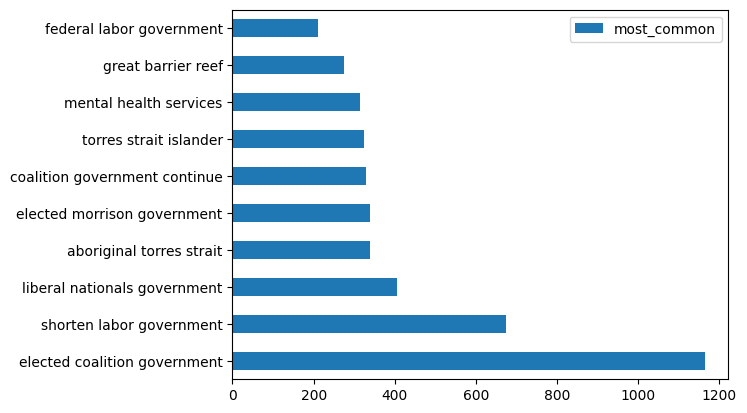

In [9]:
df_wordcount.sum(axis='rows').sort_values(ascending=False).to_frame("most_common").head(10).plot(kind = 'barh')

# 1.2.2 TASK: Create method or methods for output and graph in previous 1.2.1

In [10]:
# YOUR CODE HERE
def vector_to_df(ARG1, ARG2):
    # YOUR CODE HERE
    pass

## 1.3 Word Clouds

### 1.3.1 Code to produce word cloud

In [11]:
vectorizer = CountVectorizer(
    analyzer = 'word',          # Whether the feature should be made of word or character n-grams or a mixture of both.
    stop_words = 'english',     # Remove stop words. Can be a list of stop words or a string from {'english', 'spanish'}.
    lowercase = True,           # Convert text to lowercase.
    ngram_range = (1,3),
    min_df = .1
    
)
counts = vectorizer.fit_transform(df_all['text']).toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), counts))

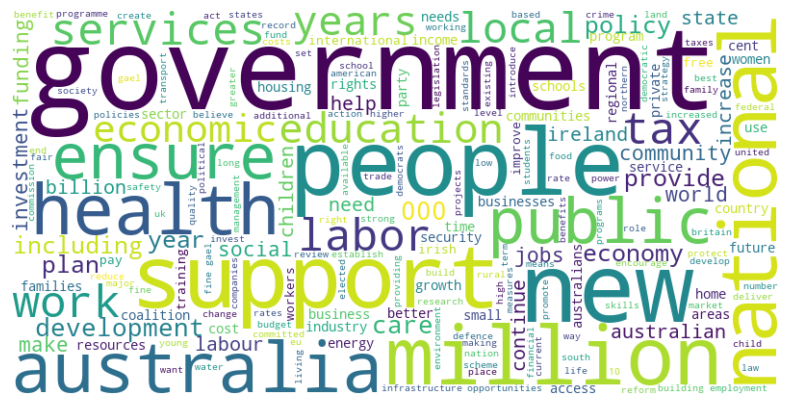

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 1.3.2 TASK: Create method combining code from 1.3.1

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# YOUR CODE HERE
def generate_country_wordcloud(country_name, df, ax=None, save_path=False):
    # YOUR CODE HERE
    pass

### EXAMPLE Output from task 1.3.2

In [14]:
generate_country_wordcloud(
    country_name = 'United States',
    df = df_all,
    save_path = False
)

## 1.4 Word frequency time series

In [15]:
vocab_list = ['environment', 'emissions']
vectorizer = CountVectorizer(
    stop_words = 'english',     # Remove stop words. Can be a list of stop words or a string from {'english', 'spanish'}.
    lowercase = True,           # Convert text to lowercase.
    ngram_range = (1,1),
    vocabulary = vocab_list 
    
)
counts = vectorizer.fit_transform(df_all['text']).toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), counts))
word_freq

{'environment': np.int64(2910), 'emissions': np.int64(1229)}

### 1.4.1 Count by year and date

In [16]:
# add year column
df_all = df_all.reset_index().assign(year = lambda column: column['date'].dt.year)
df_all.head(2)

,countryname,date,party,partyname,keys,manifesto_id,text,year
0,Australia,1961-12-01,63320,Australian Labor Party,63320_196112,63320_196112,Labour government would subsidise interest rat...,1961
1,Australia,1961-12-01,63330,Democratic Labor Party,63330_196112,63330_196112,New concepts needed for Nation’s problems. Me...,1961


In [17]:
word_freq_by_country = {}
for country_name, country_df in df_all.groupby(['countryname', 'year']):
    vectorizer = CountVectorizer(
        stop_words='english',
        lowercase=True,
        ngram_range=(1, 1),
        vocabulary=vocab_list
    )
    counts = vectorizer.fit_transform(country_df['text']).toarray().sum(axis=0)
    word_freq_by_country[country_name] = dict(zip(vectorizer.get_feature_names_out(), counts))
df_timeseries = pd.DataFrame(word_freq_by_country).transpose()
df_timeseries.head(2)

environment  emissions
Australia 1961            0          0
          1963            0          0

#### Convert to Long

In [18]:
df_long = df_timeseries.stack().to_frame('count').reset_index()
df_long.head(3)

,level_0,level_1,level_2,count
0,Australia,1961,environment,0
1,Australia,1961,emissions,0
2,Australia,1963,environment,0


In [19]:
df_long = df_long.rename({"level_0": 'country', 'level_1':'year', 'level_2': 'vocab'}, axis='columns')
df_long.head(2)

,country,year,vocab,count
0,Australia,1961,environment,0
1,Australia,1961,emissions,0


#### Plot

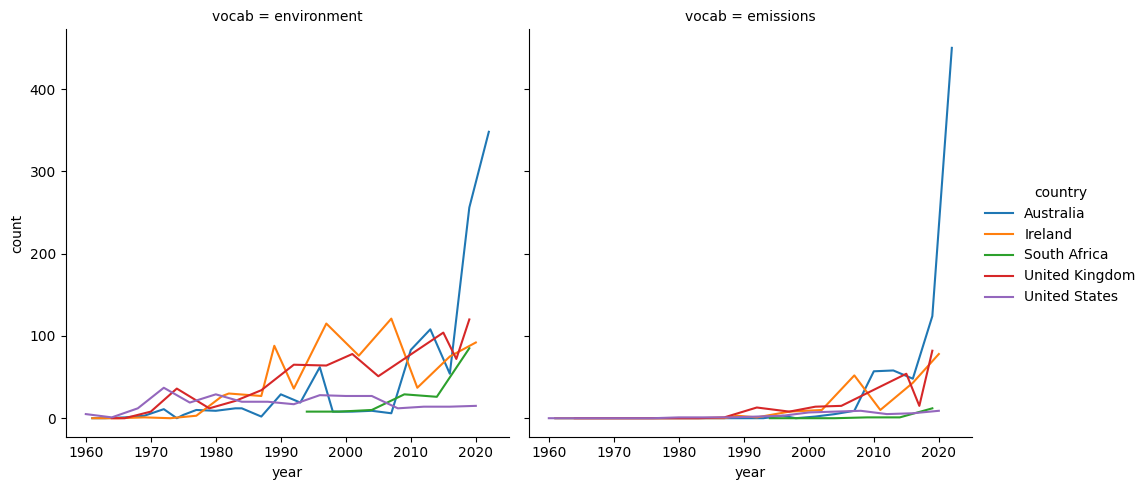

In [20]:
import seaborn as sns
sns.relplot(
    data=df_long, x="year", y="count", hue="country", col="vocab", kind="line"
)

# 2. Spacy: Part-of-speech

## 2.1 Spacy

In [21]:
df_all.tail(2)

,countryname,date,party,partyname,keys,manifesto_id,text,year
313,United States,2020-11-01,61320,Democratic Party,61320_202011,61320_202011,2020 Democratic Party Platform The platform wa...,2020
314,United States,2020-11-01,61620,Republican Party,61620_202011,61620_202011,"Preamble With this platform, we the Republican...",2020


### 2.1.1 Part of speech

#### English

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp('Labour government would subsidise interest rates for housing to encourage home-building.')
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

Labour labour ADJ JJ amod Xxxxx True False
government government NOUN NN nsubj xxxx True False
would would AUX MD aux xxxx True True
subsidise subsidise VERB VB ROOT xxxx True False
interest interest NOUN NN compound xxxx True False
rates rate NOUN NNS dobj xxxx True False
for for ADP IN prep xxx True True
housing housing NOUN NN pobj xxxx True False
to to PART TO aux xx True True
encourage encourage VERB VB advcl xxxx True False
home home NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
building building NOUN NN dobj xxxx True False
. . PUNCT . punct . False False


#### Japanese

In [28]:
import spacy
nlp = spacy.load("ja_core_news_sm")
doc = nlp('労働党政府は住宅建設を促進するために住宅ローンの金利を補助する予定です。')
for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
    print(token.text, token.pos_, token.tag_, token.dep_)

労働 NOUN 名詞-普通名詞-サ変可能 compound
党 NOUN 接尾辞-名詞的-一般 compound
政府 NOUN 名詞-普通名詞-一般 nsubj
は ADP 助詞-係助詞 case
住宅 NOUN 名詞-普通名詞-一般 compound
建設 NOUN 名詞-普通名詞-サ変可能 obj
を ADP 助詞-格助詞 case
促進 VERB 名詞-普通名詞-サ変可能 acl
する AUX 動詞-非自立可能 aux
ため SCONJ 名詞-普通名詞-副詞可能 mark
に SCONJ 助詞-格助詞 fixed
住宅 NOUN 名詞-普通名詞-一般 compound
ローン NOUN 名詞-普通名詞-一般 nmod
の ADP 助詞-格助詞 case
金利 NOUN 名詞-普通名詞-一般 obj
を ADP 助詞-格助詞 case
補助 VERB 名詞-普通名詞-サ変可能 acl
する AUX 動詞-非自立可能 aux
予定 NOUN 名詞-普通名詞-サ変可能 ROOT
です AUX 助動詞 cop
。 PUNCT 補助記号-句点 punct


### 2.1.2 Entity extraction

In [23]:
doc = nlp("Preamble With this platform, we the Republican Party reaffirm the principles that unite us in a common purpose. We believe in American exceptionalism. We believe the United States of America is unlike any other nation on earth.")
for ent in doc.ents:
    print(ent.text, ent.label_)

the Republican Party ORG
American NORP
the United States of America GPE


### 2.1.3 Pipeline

In [24]:
from tqdm import tqdm
import spacy

# Define keywords
KEYWORDS = ["emissions", "greenhouse"]

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Prepare data
df_nlp = df_all.tail(10)
all_text = df_nlp['text'].to_list()

# Process text
pipe = nlp.pipe(all_text, 
                disable=['ner', 'entity_linker', 'textcat', 'textcat_multilabel'],
                # n_process=8,  
                # batch_size=10 
               )

# Initialize key sentences list
key_sentences = []

# Iterate over processed documents
for doc in tqdm(pipe):
    # Initialize list to store key sentences for the current document
    key_sentences_inonedocument = []
    
    # Iterate over sentences in the document
    for sentence in doc.sents:
        # Check if any keyword is present in the sentence
        if any(keyword.lower() in sentence.text.lower() for keyword in KEYWORDS):
            # Append the sentence to the list if a keyword is found
            key_sentences_inonedocument.append(sentence.text)
    
    # Append the list of key sentences for the current document to the main list
    key_sentences.append(key_sentences_inonedocument)

df_nlp['environment_sentences'] = key_sentences
df_nlp.head(2)

10it [00:19,  2.00s/it]
/var/folders/04/b6tjpns93xv4pyb_38bk8hx00000gn/T/ipykernel_68485/3611446563.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['environment_sentences'] = key_sentences


,countryname,date,party,partyname,keys,manifesto_id,text,year,environment_sentences
305,United States,2004-11-01,61320,Democratic Party,61320_200411,61320_200411,PREAMBLE As we come together to declare our vi...,2004,"[We will reduce mercury emissions, smog and ac..."
306,United States,2004-11-01,61620,Republican Party,61620_200411,61620_200411,INTRODUCTION AND PREAMBLE One hundred and fift...,2004,"[For instance, working with Congressional Repu..."


### 2.1.4 Visualize dependencies

In [25]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")
displacy.serve(doc, style="dep")

/Users/cory/Desktop/Lectures/.venv/lib/python3.12/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)


ImportError: cannot import name 'display' from 'IPython.core.display' (/Users/cory/Desktop/Lectures/.venv/lib/python3.12/site-packages/IPython/core/display.py)

# 3. Transformers: Encoder model (explaining baseline architecture)

## 3.1 Basics

### 3.1.1 Download
- https://huggingface.co/answerdotai/ModernBERT-base

In [25]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
model_id = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForMaskedLM.from_pretrained(model_id)

In [26]:
# --- Tokenizer Information ---
print("--- Tokenizer Info ---")
print(f"Tokenizer Class: {tokenizer.__class__}")
print(f"Vocabulary Size: {tokenizer.vocab_size}")
print(f"Model Max Length: {tokenizer.model_max_length}")
print(f"Special Tokens: {tokenizer.special_tokens_map}")

--- Tokenizer Info ---
Tokenizer Class: <class 'transformers.tokenization_utils_fast.PreTrainedTokenizerFast'>
Vocabulary Size: 50280
Model Max Length: 8192
Special Tokens: {'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}


In [27]:
# --- Model Configuration (Best way to get layer count, etc.) ---
print("--- Model Config ---")
print(f"Model Class: {model.__class__}")
print(f"Number of Hidden Layers: {model.config.num_hidden_layers}")
print(f"Number of Attention Heads: {model.config.num_attention_heads}")
print(f"Hidden Size: {model.config.hidden_size}")
print(f"Intermediate Size: {model.config.intermediate_size}")
print(f"Vocabulary Size (from model): {model.config.vocab_size}")

--- Model Config ---
Model Class: <class 'transformers.models.modernbert.modeling_modernbert.ModernBertForMaskedLM'>
Number of Hidden Layers: 22
Number of Attention Heads: 12
Hidden Size: 768
Intermediate Size: 1152
Vocabulary Size (from model): 50368


In [28]:
# --- Full Model Architecture ---
print("--- Full Model Architecture (Truncated) ---")
print(model)

--- Full Model Architecture (Truncated) ---
ModernBertForMaskedLM(
  (model): ModernBertModel(
    (embeddings): ModernBertEmbeddings(
      (tok_embeddings): Embedding(50368, 768, padding_idx=50283)
      (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (drop): Dropout(p=0.0, inplace=False)
    )
    (layers): ModuleList(
      (0): ModernBertEncoderLayer(
        (attn_norm): Identity()
        (attn): ModernBertAttention(
          (Wqkv): Linear(in_features=768, out_features=2304, bias=False)
          (rotary_emb): ModernBertRotaryEmbedding()
          (Wo): Linear(in_features=768, out_features=768, bias=False)
          (out_drop): Identity()
        )
        (mlp_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): ModernBertMLP(
          (Wi): Linear(in_features=768, out_features=2304, bias=False)
          (act): GELUActivation()
          (drop): Dropout(p=0.0, inplace=False)
          (Wo): Linear(in_features=1152, out_features=768

### 3.1.2 Tokenize the text

- **Splits text into tokens:** Breaks input text into subword units (e.g., words, subwords, or characters) based on the tokenizer’s vocabulary.
- **Converts tokens to IDs:** Assigns each token a unique integer ID from the tokenizer’s vocabulary.
- **Adds special tokens:** Includes tokens like `[CLS]`, `[SEP]`, or `[MASK]` as required by the model architecture.
- **Returns attention masks (optional):** Generates masks to distinguish real tokens from padding tokens in fixed-length sequences.

In [29]:
text = "The capital of France is"
tokens_1 = tokenizer(text, return_tensors="pt")
tokens_1

{'input_ids': tensor([[50281,   510,  5347,   273,  6181,   310, 50282]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [30]:
text = "The capital of France is [MASK]"
tokens_1 = tokenizer(text, return_tensors="pt")
tokens_1

{'input_ids': tensor([[50281,   510,  5347,   273,  6181,   310, 50284, 50282]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [31]:
tokens_list = tokenizer.convert_ids_to_tokens(tokens_1["input_ids"][0])
tokens_list

['[CLS]', 'The', 'Ġcapital', 'Ġof', 'ĠFrance', 'Ġis', '[MASK]', '[SEP]']

In [32]:
embeddings = model.get_input_embeddings()(tokens_1['input_ids'])
embeddings.shape

torch.Size([1, 8, 768])

In [33]:
text = "The capital of the country of France is [MASK]"
tokens_2 = tokenizer(text, return_tensors="pt")
tokens_2

{'input_ids': tensor([[50281,   510,  5347,   273,   253,  2586,   273,  6181,   310, 50284,
         50282]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [34]:
embeddings = model.get_input_embeddings()(tokens_2['input_ids'])
embeddings.shape

torch.Size([1, 11, 768])

### 3.1.3 Model Process

- **Convert to embedding space:** Maps token IDs to dense vectors (embeddings) that capture semantic and syntactic meaning.
- **Process through layers:** Transforms embeddings via attention and feed-forward networks into contextualized representations.
- **Generate logits:** Projects final representations into vocabulary space, outputting raw scores (`logits`) for each possible token.


---

### Top 5 Common Tasks for Encoder Models

1. **Masked Language Modeling (MLM)**
   - *Logits Process:*
     For each masked token, the model uses its contextualized representation to generate logits over the entire vocabulary. The logits are converted to probabilities to predict the masked word.
   - *Example:*
     Input: "The cat sat on the [MASK]"
     Logits for `[MASK]` → Softmax → Output: "mat" (0.8), "floor" (0.1), etc.


2. **Sequence Classification**
   - *Logits Process:*
     The model processes the entire input sequence and generates a single set of logits (one per class) using a **classification head** (e.g., a linear layer) on top of the `[CLS]` token’s final representation. The logits are converted to probabilities via softmax to predict the class.
   - *Example:*
     Input: "This movie was amazing!"
     Logits → Softmax → Output: *Positive* (0.9), *Neutral* (0.05), *Negative* (0.05).

3. **Token Classification**
   - *Logits Process:*
     The model generates logits for each token independently using a **token-wise linear layer**. Each token’s final representation is projected to a set of logits for all possible labels (e.g., NER tags or POS tags).
   - *Example:*
     Input: "Apple is in Cupertino"
     Logits for "Apple" → Softmax → Output: *Organization* (0.95), *Location* (0.03), etc.

4. **Question Answering (Extractive QA)**
   - *Logits Process:*
     The model generates two sets of logits: one for the **start position** and one for the **end position** of the answer span in the context. Each token’s representation is projected to a scalar logit, and the highest-scoring span is selected.
   - *Example:*
     Input: *Question:* "Where is the Eiffel Tower?" *Context:* "The Eiffel Tower is in Paris."
     Start logits: "Paris" (0.9), "Tower" (0.05), etc.
     End logits: "Paris" (0.85), "." (0.1), etc.
     Output: "Paris".

5. **Natural Language Inference (NLI)**
   - *Logits Process:*
     The model concatenates the premise and hypothesis representations (often using `[CLS]` or pooled outputs) and projects them to logits for three classes: *entailment*, *contradiction*, or *neutral*. Softmax converts logits to probabilities.
   - *Example:*
     Input: *Premise:* "It’s raining." *Hypothesis:* "The ground is wet."
     Logits → Softmax → Output: *Entailment* (0.9), *Contradiction* (0.05), *Neutral* (0.05).

In [35]:
outputs_1 = model(**tokens_1)
outputs_1.logits.shape

torch.Size([1, 8, 50368])

In [36]:
outputs_2 = model(**tokens_2)
outputs_2.logits.shape

torch.Size([1, 11, 50368])

## 3.2 Visualize embeddings

### **Embeddings & Function Overview**

#### **What is an Embedding?**
- A dense vector (e.g., 768D) representing a word/token in a way that captures semantic meaning.
- Similar words/tokens have similar vectors.
- Used in NLP models to understand context and relationships.
- **Created through training on large text corpora where words appearing in similar contexts get similar representations**
- **Can capture nuanced relationships like analogies (e.g., "king - man + woman = queen")**
- **Enable mathematical operations in vector space that reflect semantic relationships**
- **Transform discrete, sparse categorical data (words) into continuous, dense numerical representations**
- **Allow models to generalize better by learning smooth, continuous representations of language**

#### **Function Context: visualize_token_embeddings()**
- **Takes a sentence and converts each token into its corresponding 768-dimensional embedding vector**
- **Uses PCA (Principal Component Analysis) to reduce the 768D embeddings to 2D for visualization purposes**
- **Plots tokens in a 2D scatter plot where spatial proximity reflects semantic similarity**
- **Each token's position in the 2D space preserves as much of the original semantic relationships as possible**
- **Color-codes tokens by their position in the sequence, making it easy to trace the sentence structure**
- **Shows how the model represents different words in geometric space, revealing clusters of semantically related tokens**

### 3.2.1 Reduce 768 dimensions of the transformer to 2d with PCA (dimension reduction technique)

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Suppress PCA warnings

def visualize_token_embeddings(sentence, tokenizer, model):
    inputs = tokenizer(sentence, return_tensors="pt")
    tokens = [tokenizer.decode([tid]) for tid in inputs["input_ids"][0]]
    
    # Get embeddings: token IDs → 768D vectors with semantic meaning
    embeddings = model.get_input_embeddings()(inputs["input_ids"])
    embeddings_2d = embeddings[0].detach().numpy()  # (seq_len, 768)
    
    # Reduce 768 dimensions → 2 dimensions for visualization
    pca = PCA(n_components=2, random_state=42)
    embeddings_pca = pca.fit_transform(embeddings_2d)
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], s=250, 
                        c=range(len(tokens)), cmap='viridis', 
                        edgecolors='black', linewidth=2, alpha=0.8)
    
    for i, token in enumerate(tokens):
        ax.annotate(token, (embeddings_pca[i, 0], embeddings_pca[i, 1]), 
                   fontsize=12, ha='center', va='bottom', fontweight='bold')
    
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
    ax.set_title(f'Token Embeddings: "{sentence}"\n768D semantic vectors → 2D visualization', 
                fontsize=13, pad=15)
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

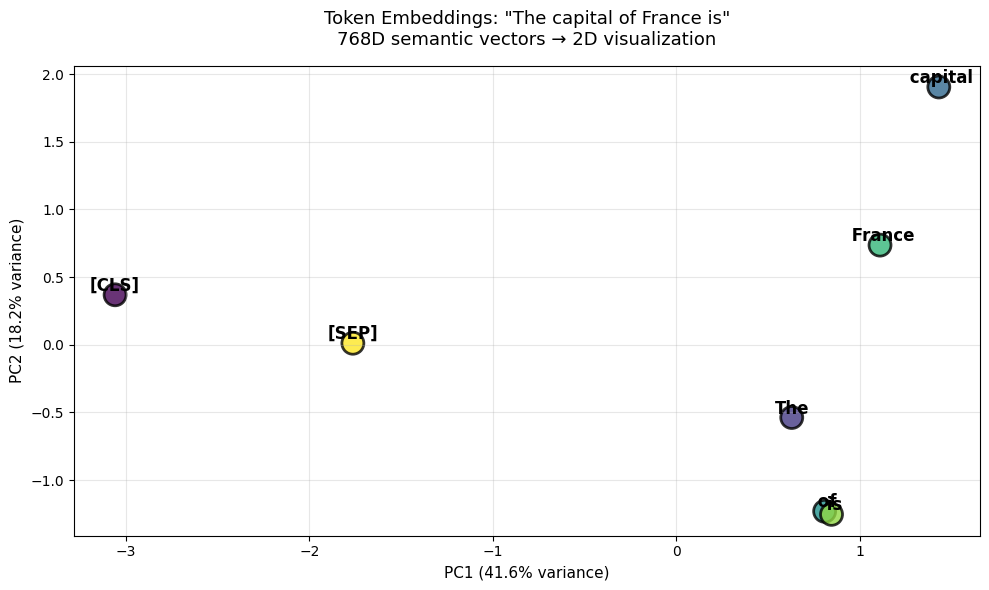

In [38]:
visualize_token_embeddings("The capital of France is", tokenizer, model)

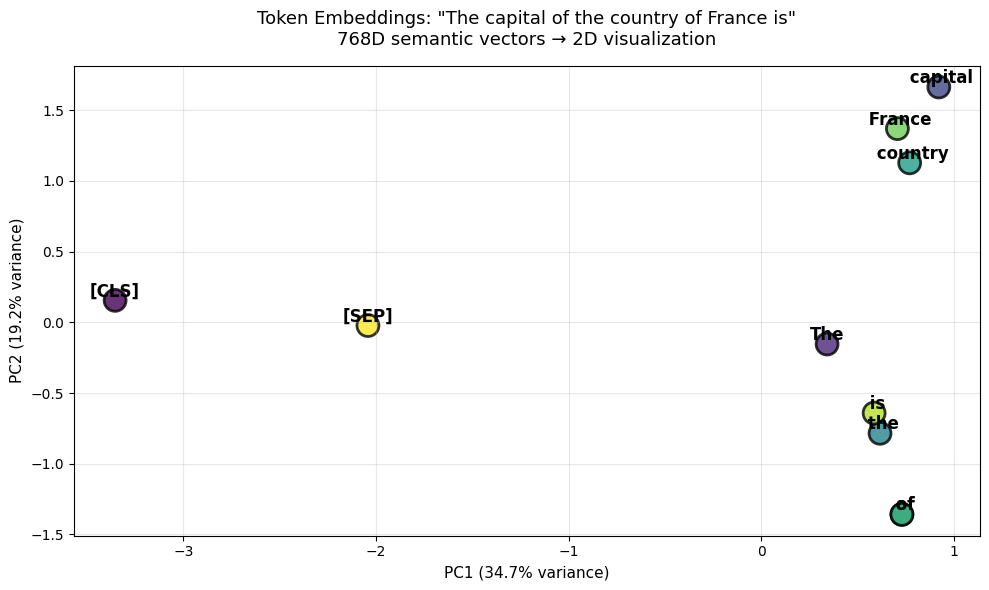

In [39]:
visualize_token_embeddings("The capital of the country of France is", tokenizer, model)

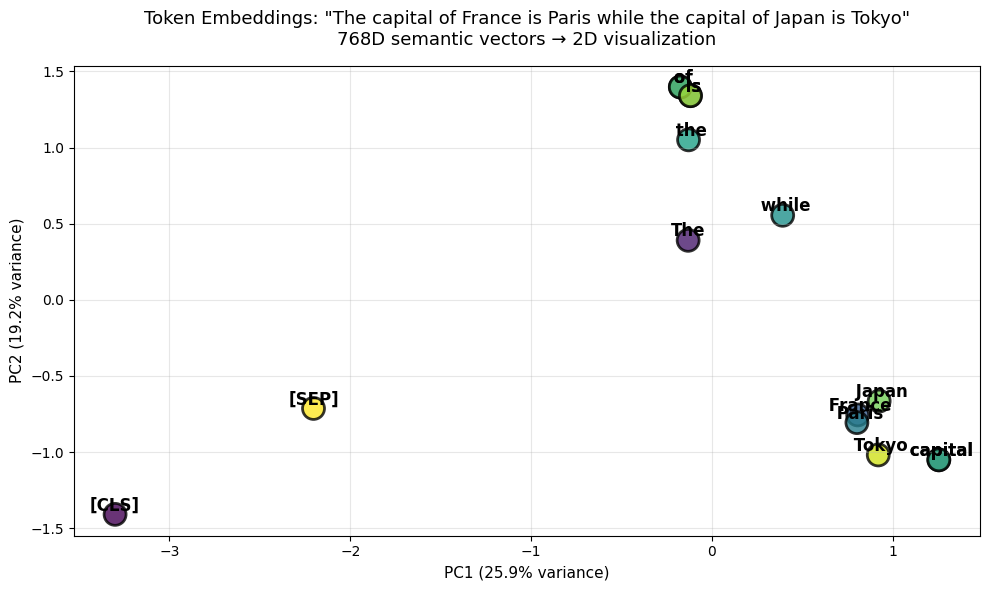

In [40]:
visualize_token_embeddings("The capital of France is Paris while the capital of Japan is Tokyo", tokenizer, model)

### 3.2.2 768D-3D with PCA

In [41]:
from sklearn.decomposition import PCA
import numpy as np
import warnings
import torch
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

def visualize_token_embeddings_3d(sentence, tokenizer, model):
    """
    Visualizes token embeddings in 3D using PCA (Interactive with Plotly).
    """
    # Automatically add [MASK]
    sentence = sentence + " [MASK]"
    inputs = tokenizer(sentence, return_tensors="pt")
    tokens = [tokenizer.decode([tid]) for tid in inputs["input_ids"][0]]
    
    # Get embeddings: token IDs → 768D vectors
    with torch.no_grad():
        embeddings = model.get_input_embeddings()(inputs["input_ids"])
    embeddings_nd = embeddings[0].numpy()  # (seq_len, 768)

    # Reduce 768 dimensions → 3 dimensions
    pca = PCA(n_components=3, random_state=42)
    embeddings_pca = pca.fit_transform(embeddings_nd)
    
    # Create interactive 3D scatter plot
    fig = px.scatter_3d(
        x=embeddings_pca[:, 0],
        y=embeddings_pca[:, 1],
        z=embeddings_pca[:, 2],
        text=tokens,  # Token labels on hover and display
        color=np.arange(len(tokens)),  # Color by index
        color_continuous_scale='Viridis',
        size_max=18,
        title=f'3D Token Embeddings: "{sentence}"<br>'
              f'768D → 3D (Total Variance Explained: {np.sum(pca.explained_variance_ratio_):.1%})'
    )

    # Customize layout
    fig.update_traces(
        marker=dict(size=10, opacity=0.9, line=dict(width=2, color='DarkSlateGrey')),
        textposition='top center',
        hovertemplate="<b>%{text}</b><br><br>"
                      "PC1: %{x}<br>"
                      "PC2: %{y}<br>"
                      "PC3: %{z}<br>"
    )

    fig.update_layout(
        scene=dict(
            xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
            yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
            zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)',
        ),
        width=900,
        height=700,
        margin=dict(r=20, b=10, l=10, t=60),
        title=dict(x=0.5)
    )

    fig.show()

In [42]:
visualize_token_embeddings_3d("The capital of Japan is not Paris is it?", tokenizer, model)

## 3.3 Visualize Attention

### **Attention & Function Overview**

#### **What is Attention?**
- A mechanism that assigns importance scores to different tokens when processing a specific token
- Shows which parts of the input the model focuses on to make predictions
- Each attention head can learn different patterns (e.g., syntax, semantics, positional relationships)
- **Computed as similarity between query (current token) and keys (all tokens) in the sequence**
- **Values range from 0 to 1, with higher scores indicating stronger relationships between tokens**
- **Multi-head attention allows the model to attend to different aspects simultaneously**
- **Enables the model to capture long-range dependencies in text**
- **Self-attention compares each token to every other token in the sequence, creating a full attention matrix**

### 3.3.1 Visualize by layer


#### **Function Context: plot_attention_by_layer()**
#### SUMMARY
- Higher attention weights (darker/warmer colors) indicate stronger focus from the source token to the target token
- Enables comparative analysis of attention distribution across different model depths and heads

#### More info
- **Extracts attention weights from any source token position in the input sequence**
- **Focuses on how much attention the source token gives TO all other tokens in the sequence**
- **Can automatically locate source token by name (e.g., "cat") or use explicit position index**
- **Visualizes attention across all layers, specific layers, specific heads, or layer-head combinations**
- **Uses heatmaps to show attention strength, with color gradients indicating attention weights**
- **Reveals which tokens the source token attends to when being processed**
- **Shows how attention patterns evolve through network depth (early vs. later layers)**
- **Supports granular analysis: single head in single layer, all heads in one layer, or one head across all layers**
- **Displays tokens on x-axis with attention weights as color intensity, making patterns easily identifiable**

In [43]:
def plot_attention_by_layer(model, tokenizer, tokens, source_token=None, source_pos=0, layer=None, head=None, figsize=(16, 12)):
    with torch.no_grad():
        outputs = model(**tokens, output_attentions=True)

    attentions = outputs.attentions
    token_labels = [tokenizer.decode([t]) for t in tokens['input_ids'][0]]
    
    if source_token is not None:
        matching_positions = [i for i, label in enumerate(token_labels) if source_token.lower() in label.lower()]
        if not matching_positions:
            raise ValueError(f"Token '{source_token}' not found in sequence: {token_labels}")
        source_pos = matching_positions[0]
        if len(matching_positions) > 1:
            print(f"Multiple matches for '{source_token}' at positions {matching_positions}. Using position {source_pos}.")
    
    if layer is not None and head is not None:
        attention = attentions[layer][0, head, source_pos, :].detach().cpu().numpy().reshape(1, -1)
        title = f'Layer {layer}, Head {head}'
    elif layer is not None:
        attention = attentions[layer][0, :, source_pos, :].mean(0).detach().cpu().numpy().reshape(1, -1)
        title = f'Layer {layer} (averaged across heads)'
    elif head is not None:
        attention = np.array([attn[0, head, source_pos, :].detach().cpu().numpy() for attn in attentions])
        title = f'Head {head}'
    else:
        attention = np.array([attn[0, :, source_pos, :].mean(0).detach().cpu().numpy() for attn in attentions])
        title = 'All Layers'

    n_plots = len(attention)
    n_cols = 4
    n_rows = (n_plots + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = np.array([axes]).flatten()

    for idx in range(n_plots):
        layer_attention = attention[idx] if n_plots > 1 else attention
        im = axes[idx].imshow(layer_attention.reshape(1, -1), cmap='RdYlGn', aspect='auto')
        axes[idx].set_title(f'Layer {idx}' if (layer is None or head is not None) and not (layer is not None and head is not None) else title)
        axes[idx].set_xticks(range(len(token_labels)))
        axes[idx].set_xticklabels(token_labels, rotation=45, ha='right')
        axes[idx].set_yticks([])
        plt.colorbar(im, ax=axes[idx], shrink=0.8)

    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle(f'Attention FROM "{token_labels[source_pos]}" (position {source_pos}) - {title}')
    plt.tight_layout()
    plt.show()

Outputting attentions is only supported with the 'eager' attention implementation, not with "sdpa". Falling back to `attn_implementation="eager"`.


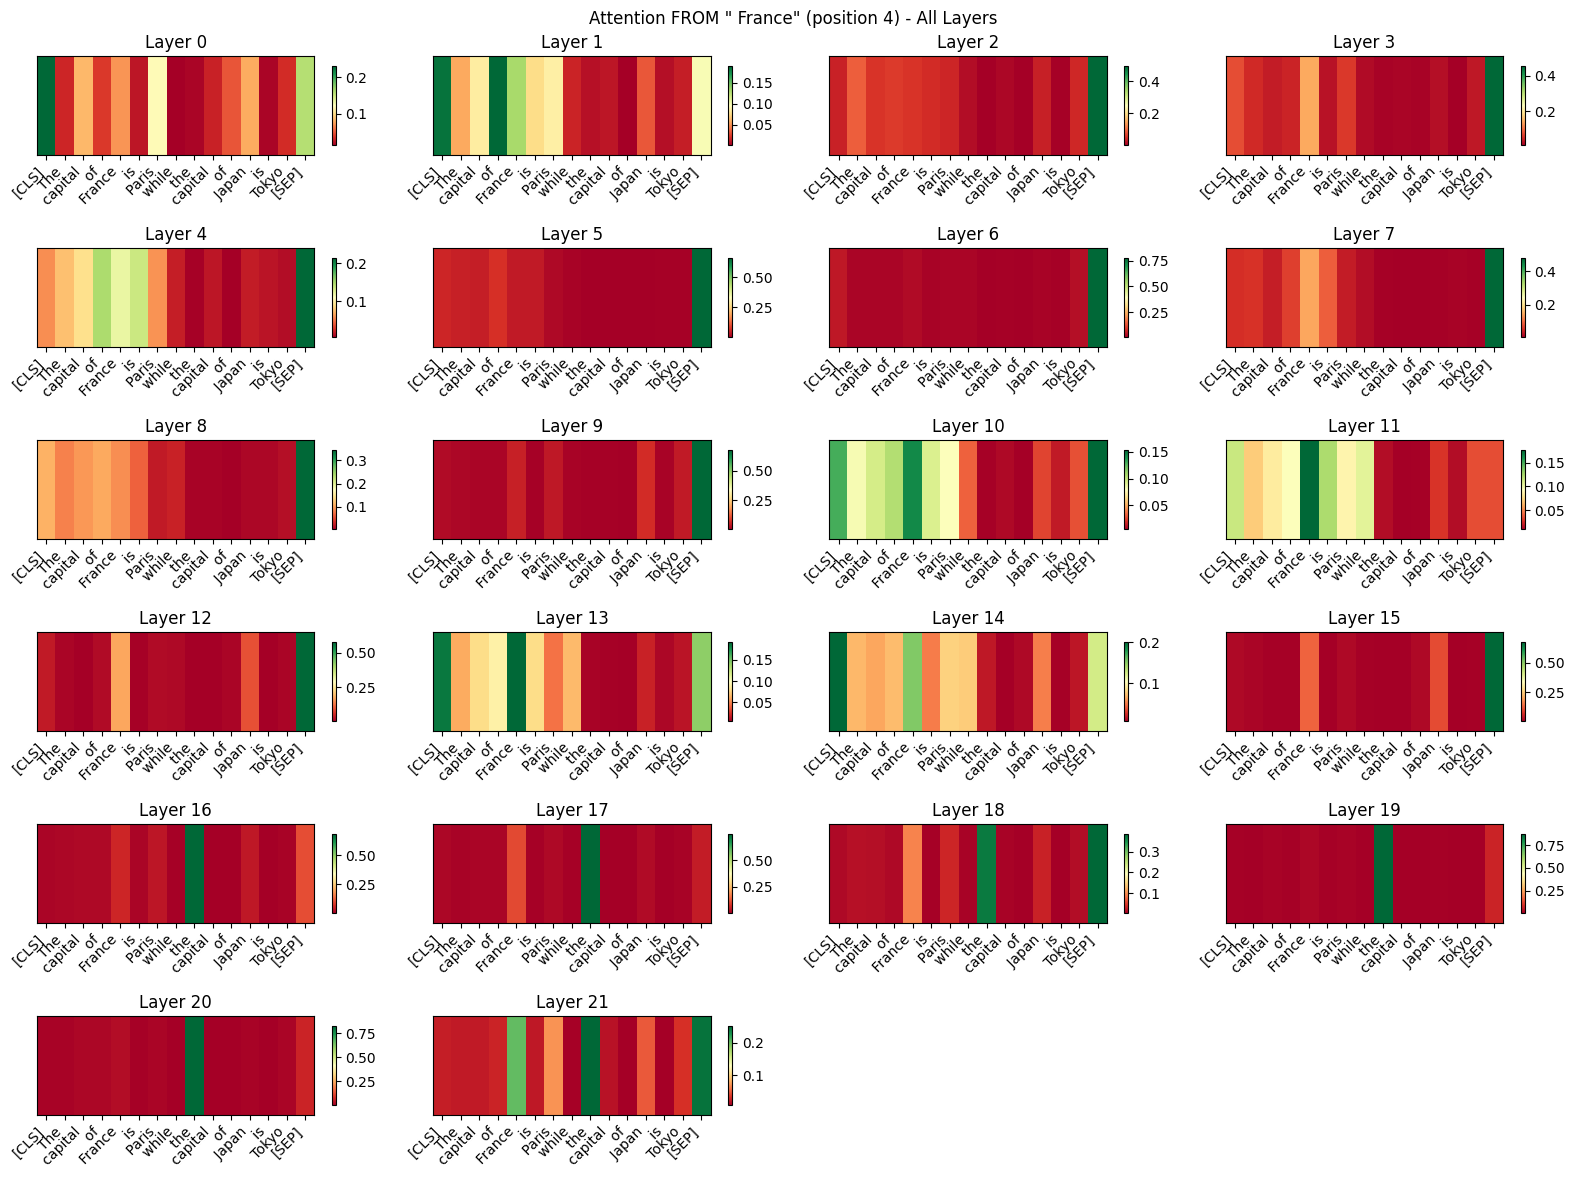

In [44]:
tokens = tokenizer("The capital of France is Paris while the capital of Japan is Tokyo", return_tensors="pt")

plot_attention_by_layer(model, tokenizer, tokens, source_token='France')

#plot_attention_by_layer(model, tokenizer, tokens, source_token='France', layer=5)

#plot_attention_by_layer(model, tokenizer, tokens, source_token='France', head=3)

#plot_attention_by_layer(model, tokenizer, tokens, source_token='France', layer=5, head=3)

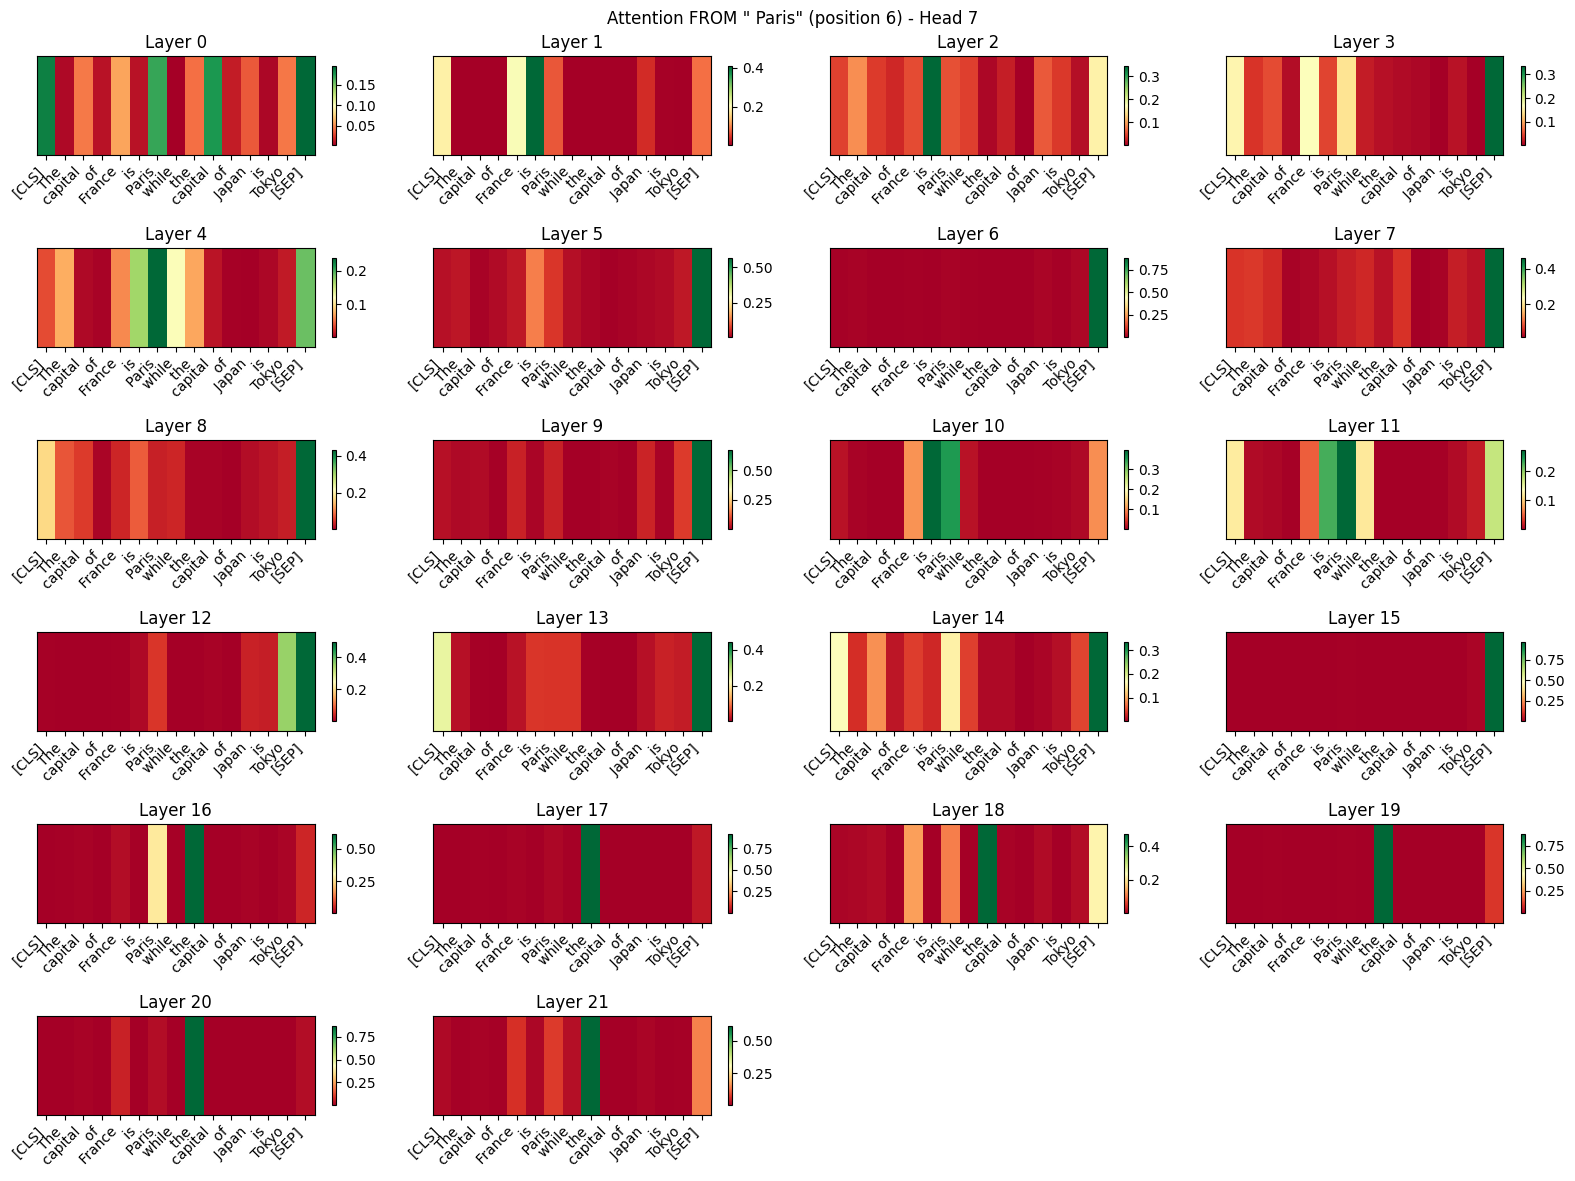

In [45]:

#plot_attention_by_layer(model, tokenizer, tokens, source_token='Japan', layer=8)

#plot_attention_by_layer(model, tokenizer, tokens, source_pos=0)

plot_attention_by_layer(model, tokenizer, tokens, source_token='Paris', head=7)

### 3.3.2 Visualize Attention Evolution via Dimensionality Reduction

#### **Function Context: plot_attention_dimension_reduction()**
#### SUMMARY
- Projects each layer's attention pattern from a source token into 2D space using PCA or t-SNE
- Clustered layers indicate similar attention strategies; separated clusters reveal distinct processing phases across network depth

#### Example Interpretation
- **"France" and "Tokyo" produce nearly identical clustering patterns in head 1**, suggesting this head has specialized to process proper nouns in prepositional phrases using a consistent, content-invariant strategy
- **Tight early-layer clusters (L0-L3) separating from late-layer clusters (L9-L11)** indicates the model transitions through distinct attention phases: local syntax → semantic relationships

#### More info
- **Treats each layer's full attention distribution as a high-dimensional vector and reduces to 2D for visualization**
- **Each point represents one layer's attention behavior from the source token to all other tokens**
- **Color gradient and labels (L0, L1, ...) show layer progression through the network**
- **Supports both PCA (linear relationships) and t-SNE (non-linear manifold structure) for reduction**
- **Can automatically locate source token by name or use explicit position index**
- **Enables cross-token comparison: visualize multiple source tokens to see if clustering patterns are universal or token-specific**
- **Supports head-specific analysis: compare different heads to identify specialized vs. generalist attention strategies**
- **Reveals architectural insights: smooth progressions suggest gradual refinement; abrupt jumps indicate phase transitions**
- **Useful for model compression: tightly clustered layers may be candidates for pruning**
- **Complements layer-by-layer heatmaps by showing global structural patterns rather than token-level detail**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_attention_dimension_reduction(model, tokenizer, tokens, source_token=None, source_pos=0, head=0, method='pca'):
    outputs = model(**tokens, output_attentions=True)
    attentions = outputs.attentions
    token_labels = [tokenizer.decode([t]) for t in tokens['input_ids'][0]]
    
    if source_token is not None:
        source_pos = [i for i, label in enumerate(token_labels) if source_token.lower() in label.lower()][0]
    
    layer_attention_patterns = []
    for layer_attn in attentions:
        attention_vector = layer_attn[0, head, source_pos, :].detach().cpu().numpy()
        layer_attention_patterns.append(attention_vector)
    
    attention_matrix = np.array(layer_attention_patterns)
    
    if method == 'pca':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42)
    
    reduced_attention = reducer.fit_transform(attention_matrix)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_attention[:, 0], reduced_attention[:, 1], 
                         c=range(len(attentions)), cmap='viridis', s=100)
    
    for i, (x, y) in enumerate(reduced_attention):
        plt.annotate(f'L{i}', (x, y), xytext=(5, 5), textcoords='offset points')
    
    plt.colorbar(scatter, label='Layer Index')
    plt.title(f'Attention FROM "{token_labels[source_pos]}" - Head {head}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout()
    plt.show()
    
    #return reduced_attention

model_id = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForMaskedLM.from_pretrained(model_id)
tokens = tokenizer("The capital of France is Paris while the capital of Japan is Tokyo", return_tensors="pt")

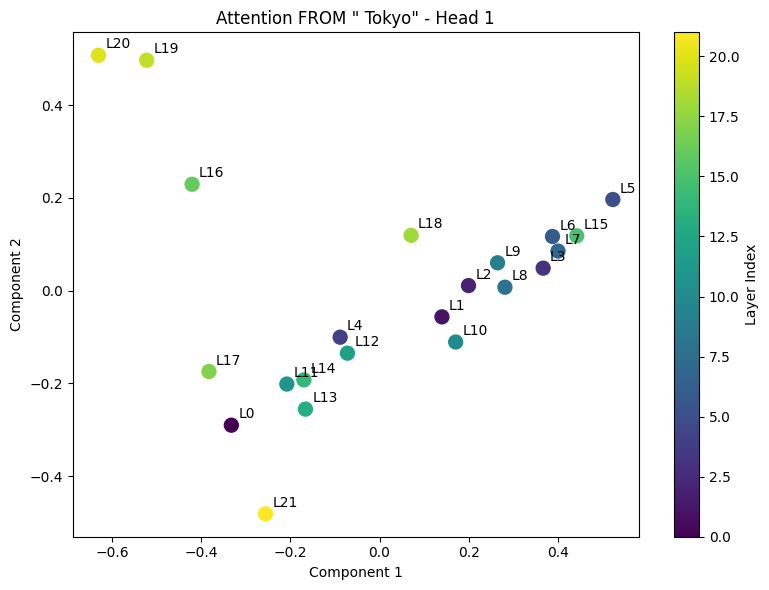

In [47]:
plot_attention_dimension_reduction(model, tokenizer, tokens, source_token='Tokyo', head=1, method='pca')

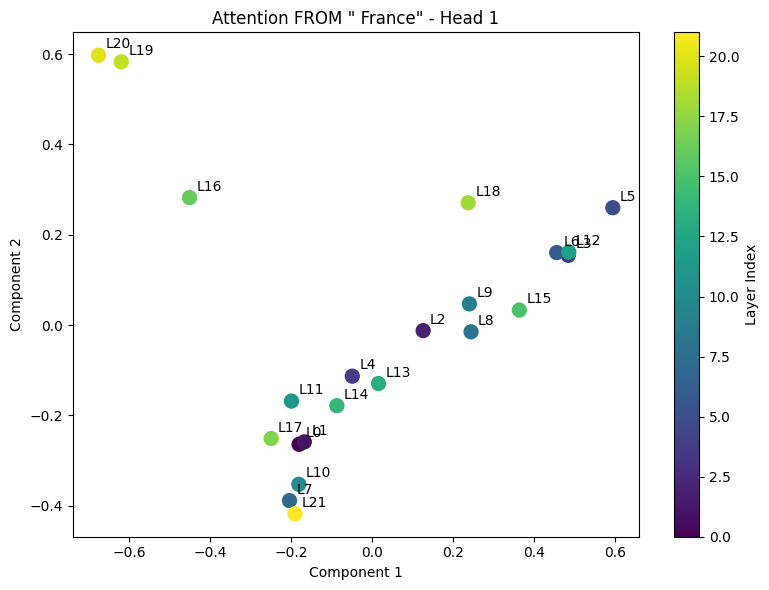

In [48]:
plot_attention_dimension_reduction(model, tokenizer, tokens, source_token='France', head=1, method='pca')

### 3.4 Visualizing the word we are trying to predict: MASK

#### **Function Context: plot_mask_predictions()**
#### SUMMARY
- Displays the top-k most likely token predictions for a [MASK] position in masked language modeling (MLM)
- Bar chart shows probability distribution, revealing the model's confidence and alternative predictions for the masked token

#### Example Interpretation
- **High probability concentrated in top 1-2 predictions** indicates the model is confident about the masked token based on surrounding context
- **Spread probabilities across multiple plausible tokens** (e.g., "Paris", "Lyon", "Marseille" for "The capital of France is [MASK]") reveals semantic uncertainty or multiple valid completions

#### More info
- **Automatically locates the [MASK] token position in the input sequence**
- **Extracts logits (raw prediction scores) from the model's output at the mask position**
- **Converts logits to probabilities using softmax normalization**
- **Ranks all vocabulary tokens by probability and selects top-k candidates**
- **Decodes token IDs back to human-readable strings for display**
- **Horizontal bar chart shows predictions in descending probability order (highest at top)**
- **Useful for debugging model understanding: reveals if the model captured context correctly**
- **Can expose biases: comparing mask predictions across different contexts reveals learned associations**
- **Complements attention visualization: see WHAT the model predicts alongside WHERE it attends**
- **Supports qualitative evaluation: check if semantically plausible tokens rank highly even if not the ground truth**

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mask_predictions(tokens, outputs, tokenizer, top_k=10):
    mask_token_id = tokenizer.mask_token_id
    mask_pos = (tokens['input_ids'][0] == mask_token_id).nonzero(as_tuple=True)[0].item()
    
    mask_logits = outputs.logits[0, mask_pos].detach().cpu().numpy()
    top_indices = np.argsort(mask_logits)[-top_k:][::-1]
    top_probs = np.exp(mask_logits[top_indices]) / np.exp(mask_logits).sum()
    top_tokens = [tokenizer.decode([idx]) for idx in top_indices]
    
    plt.figure(figsize=(10, 5))
    plt.barh(range(top_k), top_probs)
    plt.yticks(range(top_k), top_tokens)
    plt.xlabel('Probability')
    plt.title('Top 10 Predictions for [MASK]')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [50]:
text = "The capital of France is [MASK]"
tokens_1 = tokenizer(text, return_tensors="pt")
tokens_1
outputs_1 = model(**tokens_1)
outputs_1.logits.shape

torch.Size([1, 8, 50368])

In [51]:
outputs_1 = model(**tokens_1, output_hidden_states=True)
logits_1 = outputs_1.logits.detach().cpu().numpy()
logits_1.shape

(1, 8, 50368)

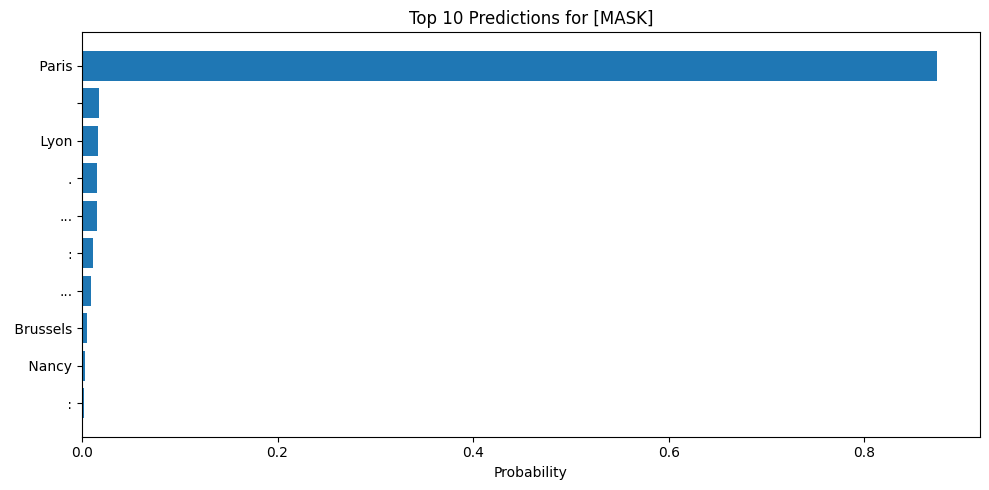

In [52]:
plot_mask_predictions(tokens_1, outputs_1, tokenizer)

In [53]:
text = "The capital of the country of France is [MASK]"
tokens_2 = tokenizer(text, return_tensors="pt")
outputs_2 = model(**tokens_2, output_hidden_states=True)
logits_2 = outputs_2.logits.detach().cpu().numpy()
logits_2.shape

(1, 11, 50368)

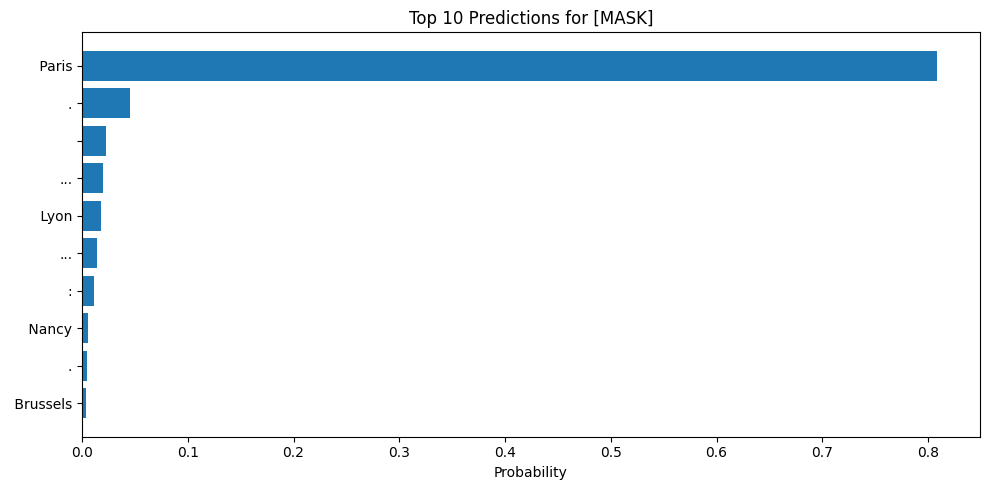

In [54]:
plot_mask_predictions(tokens_2, outputs_2, tokenizer)

# 4. Transformers: Decoder model (GPT2) & Encoder-Decoder (GPT)

## 4.1 Decoder only (GPT models, Claude, Llama)

In [58]:
from transformers import GPT2Config, GPT2LMHeadModel, GPT2Tokenizer
import torch

config = GPT2Config(
    vocab_size=50257,
    n_positions=1024,
    n_embd=768,
    n_layer=12,
    n_head=12,
)

model = GPT2LMHeadModel(config)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [66]:
from transformers import GPT2Config, GPT2LMHeadModel, GPT2Tokenizer
import torch

config = GPT2Config(
    vocab_size=50257,
    n_positions=1024,
    n_embd=768,
    n_layer=12,
    n_head=12,
)

model = GPT2LMHeadModel(config)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

text = "The capital of the country of France is"
tokens_2 = tokenizer(text, return_tensors="pt")

In [67]:
with torch.no_grad():
    outputs_2 = model(**tokens_2, output_hidden_states=True)
    logits_2 = outputs_2.logits.detach().cpu().numpy()

print(f"Logits shape: {logits_2.shape}")
print(f"Input shape: {tokens_2['input_ids'].shape}")

Logits shape: (1, 8, 50257)
Input shape: torch.Size([1, 8])


In [69]:
generated = model.generate(
    tokens_2['input_ids'],
    attention_mask=tokens_2['attention_mask'],
    max_length=20,
    num_return_sequences=1,
    temperature=0.7,
    pad_token_id=tokenizer.pad_token_id
)

print(tokenizer.decode(generated[0]))

The capital of the country of France is exComments He lap lap lap lap lap laptropNote headphone


## 4.2 Note on encoder-decoder models:


**Where decoder-only dominates:**
- **Language models / Chat**: GPT, Claude, Llama, Mistral
- **Code generation**: Codex, CodeLlama, StarCoder
- **General instruction-following**: Basically everything now
- **Reasoning tasks**: Chain-of-thought works better with decoder-only

**Why decoder-only won:**
1. **Simpler**: One architecture for everything (no encoder/decoder split)
2. **Scales better**: Easier to train massive models (100B+ params)
3. **More flexible**: Handles any text task with prompting
4. **In-context learning**: Can learn from examples in the prompt
5. **Better pre-training**: Next-token prediction on massive data works incredibly well

**Where encoder-decoder still used:**
- **Specific seq-to-seq tasks**: Translation systems (when you need that architecture)
- **Efficient fine-tuning**: T5 variants for specific tasks with limited compute
- **Retrieval-augmented systems**: Some architectures combine encoders with decoder-only LMs

**The trend:**
- 2017-2020: Encoder-decoder popular (BART, T5, mBART)
- 2020+: Decoder-only takes over (GPT-3, then everything else)
- 2023+: Almost everything new is decoder-only
